<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_12_Finding_Outliers_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


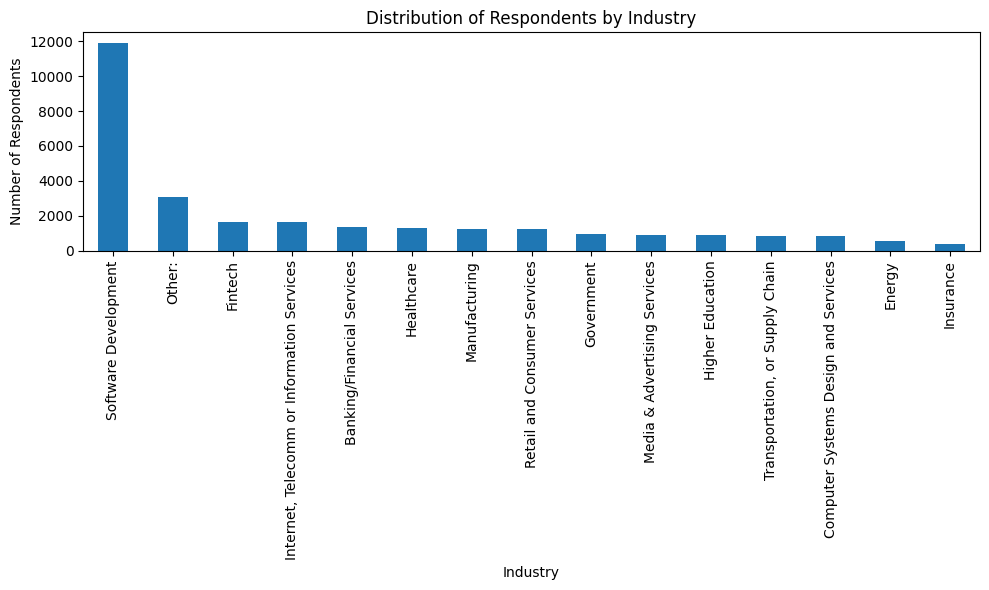

In [3]:
##Write your code here
industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
# Drop missing values in ConvertedCompYearly
comp = df["ConvertedCompYearly"].dropna()

# Calculate statistics
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")



Mean: 86155.29
Median: 65000.00
Standard Deviation: 186756.97


In [10]:
# Define threshold for extreme compensation
threshold = mean_comp + 3 * std_comp

# Filter respondents with extremely high compensation
extremely_high_comp = df[df["ConvertedCompYearly"] > threshold]

print(f"Number of respondents with extremely high compensation: {len(extremely_high_comp)}")
extremely_high_comp[["ResponseId", "ConvertedCompYearly"]]


Number of respondents with extremely high compensation: 89


,ResponseId,ConvertedCompYearly
529,530,650000.0
828,829,1000000.0
1932,1933,945000.0
2171,2172,750000.0
2187,2188,2000000.0
...,...,...
38219,38220,1000000.0
39643,39644,1300000.0
40066,40067,800000.0
40952,40953,750000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Nombre d’outliers détectés : 978


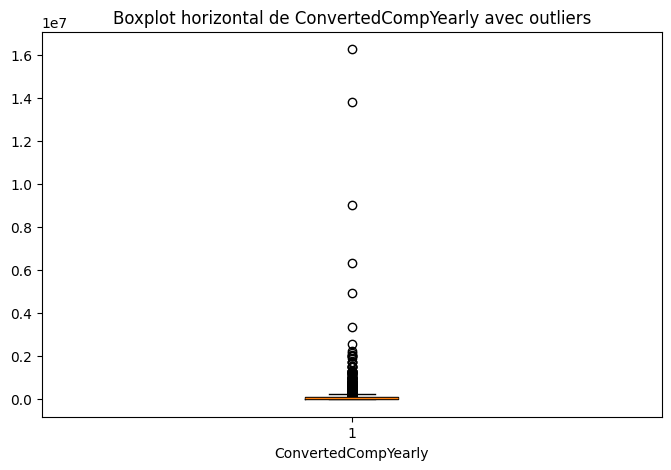

In [14]:
##Write your code here
# 2. Calculer le 1er quartile (Q1) et le 3e quartile (Q3)
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)

# 3. Calculer l'IQR
IQR = Q3 - Q1
print(f"IQR: {IQR}")

# 4. Définir les bornes pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# 5. Identifier les outliers
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]

print(f"Nombre d’outliers détectés : {len(outliers)}")

# 6. Visualiser avec un boxplot
plt.figure(figsize=(8,5))
plt.boxplot(comp, vert=True)  # horizontal
plt.title("Boxplot horizontal de ConvertedCompYearly avec outliers")
plt.xlabel("ConvertedCompYearly")
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [15]:
##Write your code here
# Supposons que les bornes lower_bound et upper_bound sont déjà calculées

# Filtrer les données sans les outliers
df_clean = df[(df["ConvertedCompYearly"] >= lower_bound) & (df["ConvertedCompYearly"] <= upper_bound)]

# Vérifier la taille du DataFrame original et du DataFrame nettoyé
print(f"Taille originale : {len(df)}")
print(f"Taille après retrait des outliers : {len(df_clean)}")



Taille originale : 65437
Taille après retrait des outliers : 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [16]:
##Write your code here
# Exemple de mapping d'âges par intervalles vers des valeurs numériques
age_map = {
    "Under 18 years": 17,
    "18-24 years": 21,
    "25-34 years": 29.5,
    "35-44 years": 39.5,
    "45-54 years": 49.5,
    "55-64 years": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None  # ou np.nan
}

# Créer une nouvelle colonne numérique AgeNum
df["AgeNum"] = df["Age"].map(age_map)



In [17]:
# Garder les colonnes numériques
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Vérifier que AgeNum est bien dedans (sinon ajouter)
if "AgeNum" not in num_cols:
    num_cols.append("AgeNum")

# Extraire un DataFrame numérique propre (sans NaN sur AgeNum)
df_num = df[num_cols].dropna(subset=["AgeNum"])


In [18]:
corr_matrix = df_num.corr()

# Corrélation d'AgeNum avec les autres colonnes
age_corr = corr_matrix["AgeNum"].sort_values(ascending=False)

print("Corrélations avec l'âge :")
print(age_corr)


Corrélations avec l'âge :
ResponseId            NaN
CompTotal             NaN
WorkExp               NaN
JobSatPoints_1        NaN
JobSatPoints_4        NaN
JobSatPoints_5        NaN
JobSatPoints_6        NaN
JobSatPoints_7        NaN
JobSatPoints_8        NaN
JobSatPoints_9        NaN
JobSatPoints_10       NaN
JobSatPoints_11       NaN
ConvertedCompYearly   NaN
JobSat                NaN
AgeNum                NaN
Name: AgeNum, dtype: float64


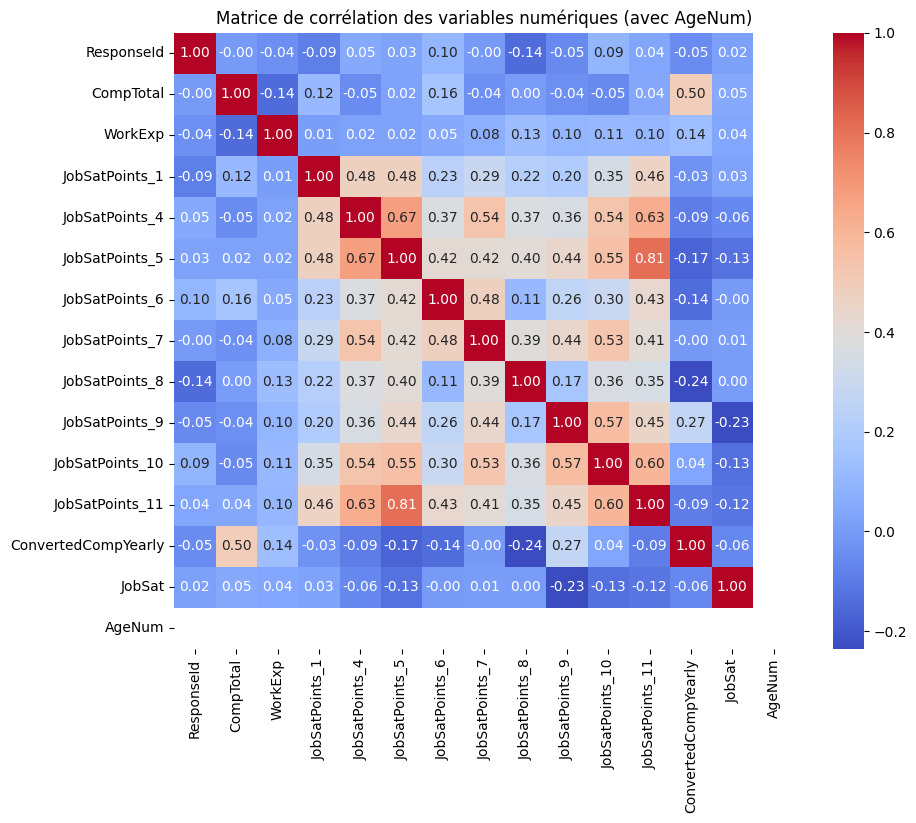

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables numériques (avec AgeNum)")
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
